# Validation of Graph Structural Properties

> Gati Aher  
> Dec 6, 2021  
> Discrete Final Project

Goal: Our project explores generation algorithms that create graphs with small-world and scale-free properties. This script check that our graphs have the expected structural properties.

We are testing for:
* Degree distribution: [networkx.classes.function.degree_histogram — NetworkX 2.6.2 documentation](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.degree_histogram.html) 
* Average path length - [networkx.algorithms.shortest_paths.generic.average_shortest_path_length — NetworkX 2.6.2 documentation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.average_shortest_path_length.html#networkx.algorithms.shortest_paths.generic.average_shortest_path_length)
* Clustering coefficient - [networkx.algorithms.cluster.average_clustering — NetworkX 2.6.2 documentation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.average_clustering.html#networkx.algorithms.cluster.average_clustering)

Other Fun Visuals:
- Adjacency Matrix
- Coloring/Sizing Hubs

Expected Results:
    
**Random** (Erydos-Renyi)
* statisitcally completely homogenous in both degree and connectivity
  
**Small-World** (Watts-Strogatz, Klemm-Eguilez)
* inhomogeneous in that the pattern of connectivity between nodes is relatively localized (tendency for nodes to cluster)
* clustering coefficient is large compared to that fo a random network of the same size and mean degree, and is almost independent of N
* average path length is comparable to that of a random network
  
S = (C/L)/(C_r/L_r)  
Define network as small-world if proximity-ratio (S) >> 1, given that S = 1 for a random network. This metric provides a means of quantitatively comparing networks.
  
**Scale-Free** (Barabasi-Albert, Klemm-Eguilez)
* inhomogeneous in the "degree" of nodes (emergence of hubs -- nodes with much larger than average number of edges to/from other nodes)
* average path length and clustering coefficient both change with N in a manner similar to the Erdos-Renyi random network

P(n) ~ n^(-y)

*Warnings*:
* The clustering coefficent of the scale-free network of Barabasi-Albert decreases as network size increases, but the rate of decrease is slower than that of a random network. However, the clustering coefficient is exttremely small relative to regular lattices 

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import watts_strogatz
import klemm_eguilez

In [16]:
# Parameters
N = 500

In [17]:
def validate(G):
    """
    Check structural properties of graph G
    """
    
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    dmax = max(degree_sequence)
    
    aspl = round(nx.average_shortest_path_length(G), 2)
    ac = round(nx.average_clustering(G), 2)
    
    fig = plt.figure("Degree of a random graph", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(5, 4)
    
    ax0 = fig.add_subplot(axgrid[0:3, :])
    pos = nx.spring_layout(G, seed=10396953)
    nx.draw_networkx_nodes(G, pos, ax=ax0, node_size=20)
    nx.draw_networkx_edges(G, pos, ax=ax0, alpha=0.4)
    ax0.set_title(f"Average Path Length: {aspl}\nClustering Coefficient: {ac}")
    ax0.set_axis_off()
    
    ax1 = fig.add_subplot(axgrid[3:, :2])
    ax1.loglog(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")

    ax2 = fig.add_subplot(axgrid[3:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")

    fig.tight_layout()
    plt.show()

# Validate Graphs

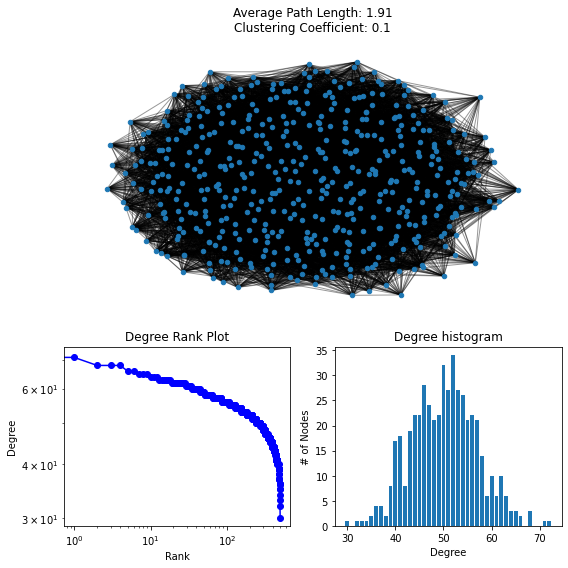

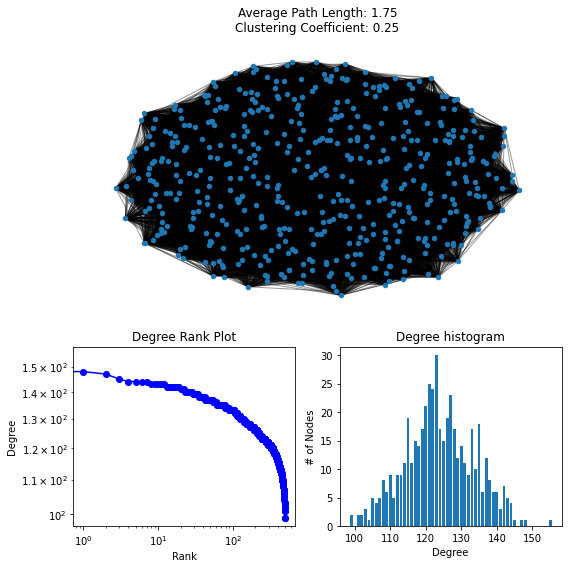

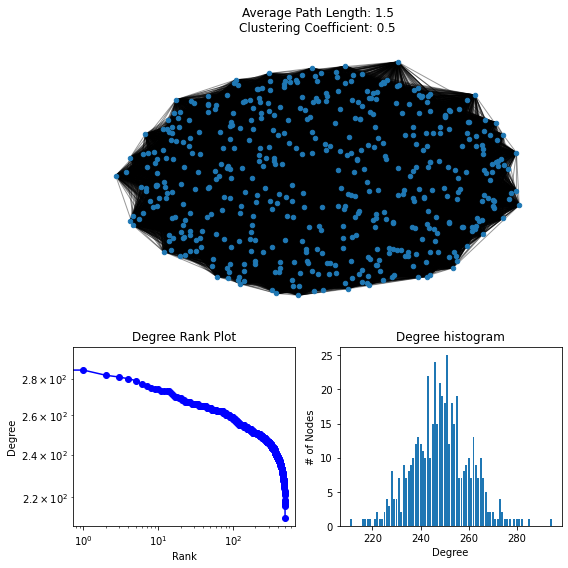

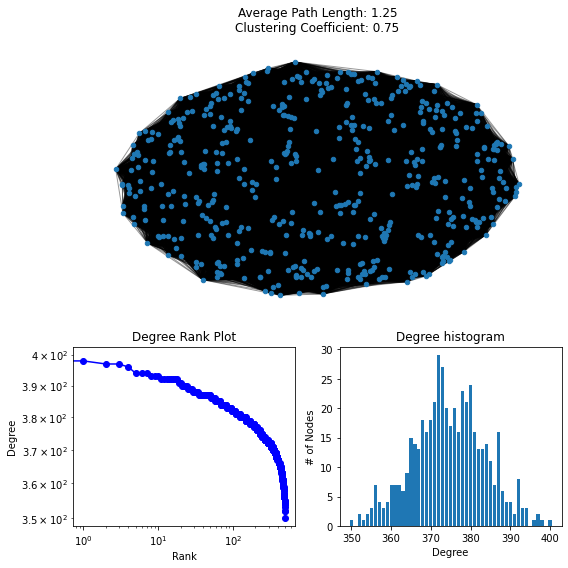

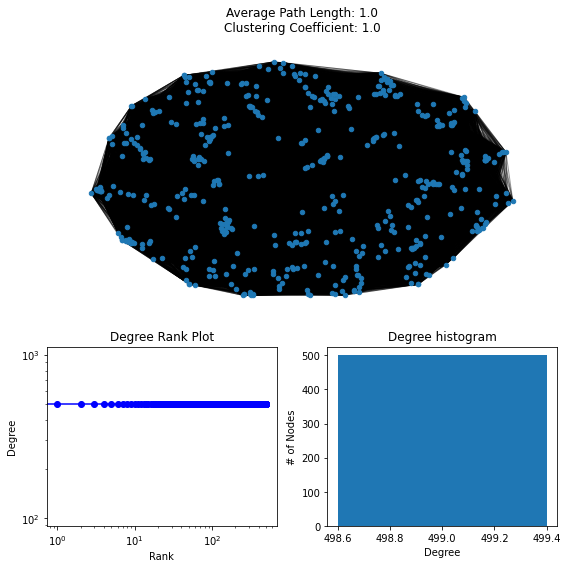

In [18]:
ER = nx.erdos_renyi_graph(n=N, p=0.1)
validate(ER)

ER = nx.erdos_renyi_graph(n=N, p=0.25)
validate(ER)

ER = nx.erdos_renyi_graph(n=N, p=0.5)
validate(ER)

ER = nx.erdos_renyi_graph(n=N, p=0.75)
validate(ER)

ER = nx.erdos_renyi_graph(n=N, p=1)
validate(ER)

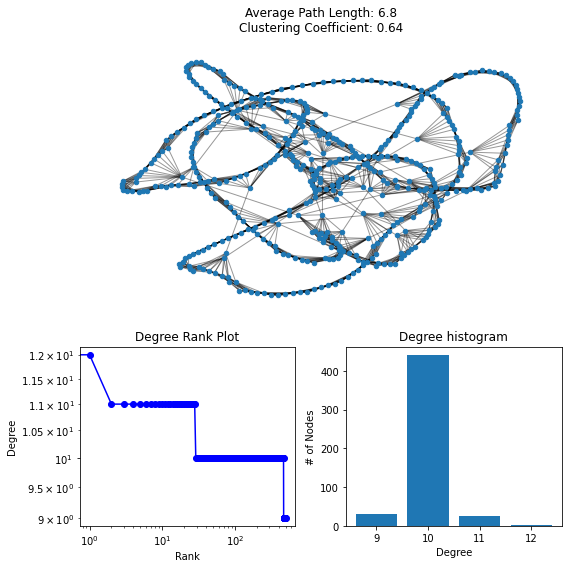

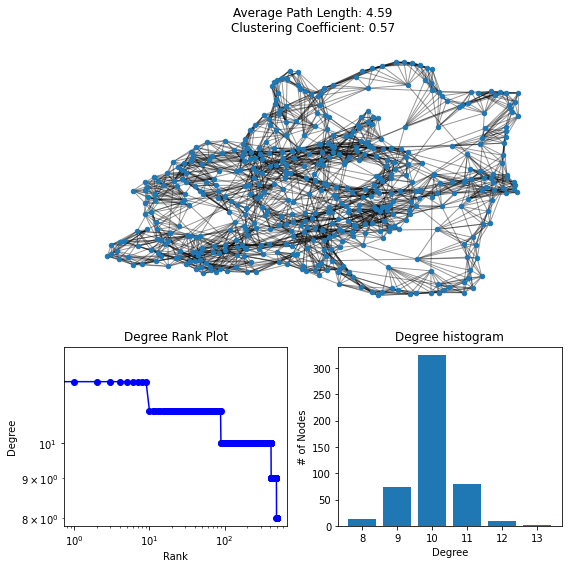

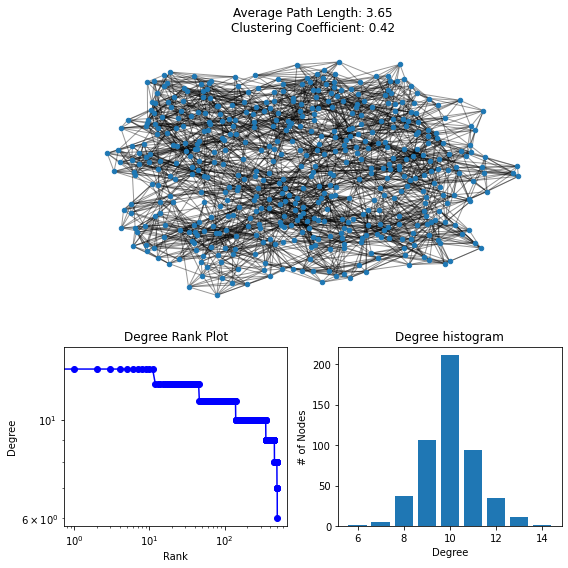

In [19]:
WS = nx.watts_strogatz_graph(n=N, k=10, p=0.01)
validate(WS)

WS = nx.watts_strogatz_graph(n=N, k=10, p=0.05)
validate(WS)

WS = nx.watts_strogatz_graph(n=N, k=10, p=0.15)
validate(WS)

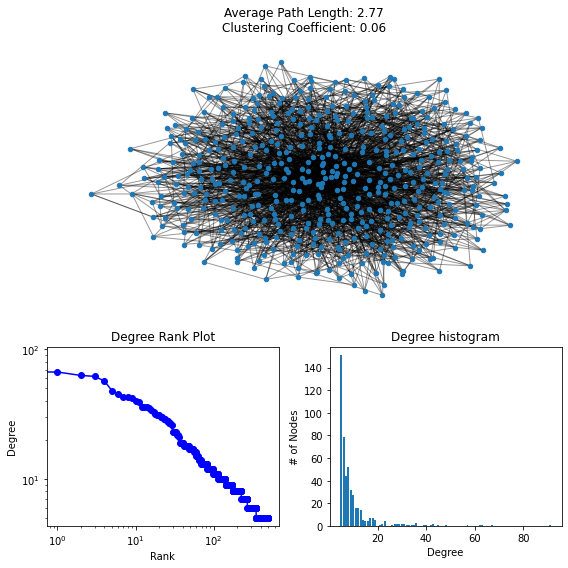

In [20]:
BA = nx.barabasi_albert_graph(n=N, m=5)
validate(BA)

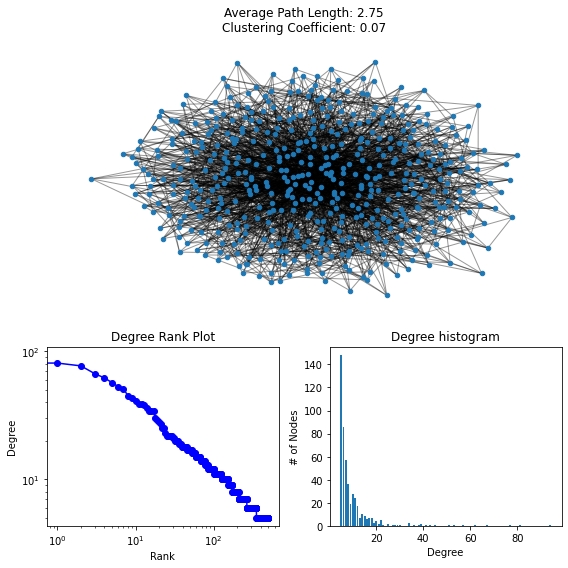

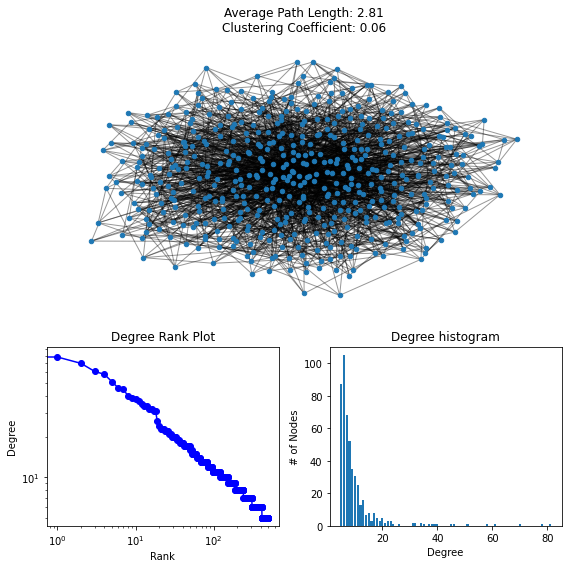

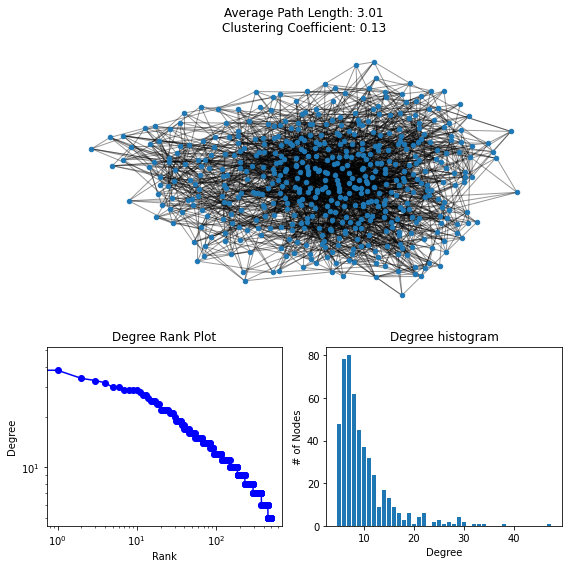

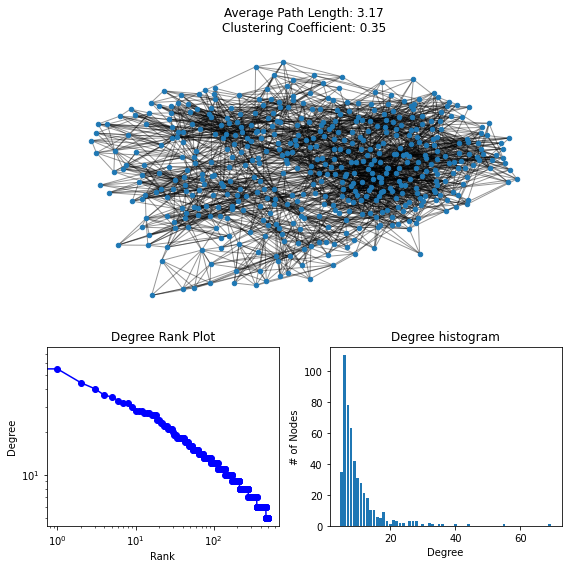

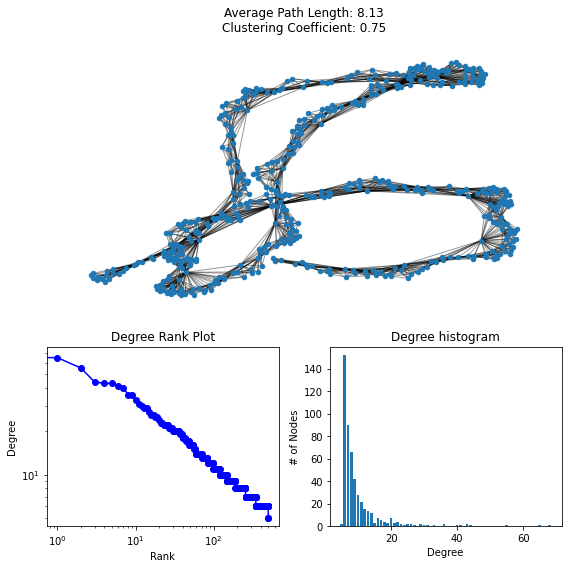

In [21]:
KE = klemm_eguilez.klemm_eguilez(N=N, M=5, P_MU=0.01)
validate(KE)

KE = klemm_eguilez.klemm_eguilez(N=N, M=5, P_MU=0.1)
validate(KE)

KE = klemm_eguilez.klemm_eguilez(N=N, M=5, P_MU=0.5)
validate(KE)

KE = klemm_eguilez.klemm_eguilez(N=N, M=5, P_MU=0.75)
validate(KE)

KE = klemm_eguilez.klemm_eguilez(N=N, M=5, P_MU=1)
validate(KE)